In [1]:
from epi_model import *

In [2]:
ct = Counter(
    (a,t)
    for (a,b,t)
    in a.edgelist
) + Counter(
    (b,t)
    for (a,b,t)
    in a.edgelist
)

NameError: name 'a' is not defined

In [27]:
list(ct.items())[0]

((0, 44), 2)

In [20]:
ct.most_common(20)

[((459, 557), 508),
 ((557, 459), 507),
 ((137, 187), 421),
 ((187, 137), 421),
 ((378, 179), 408),
 ((179, 378), 406),
 ((567, 25), 391),
 ((25, 567), 390),
 ((604, 235), 386),
 ((235, 604), 383),
 ((299, 386), 369),
 ((386, 299), 368),
 ((238, 194), 356),
 ((194, 238), 355),
 ((777, 586), 354),
 ((586, 777), 352),
 ((171, 211), 351),
 ((211, 171), 351),
 ((185, 365), 341),
 ((365, 185), 341)]

In [24]:
list(ct)[0]

(0, 44)

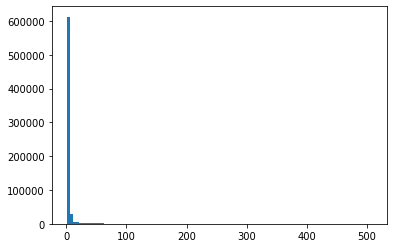

In [30]:
plt.hist( [v for v in ct.values()], bins=100 );

In [31]:
ctt = Counter( ct.values() )

In [36]:
ctt[1] / sum(ctt.values())

0.3343372240910009

In [41]:
sum(ctt[ii] for ii in range(1,2)) / sum(ctt.values())

0.3343372240910009

In [14]:
for typ in ['high school','high school2', 'primary school']:

    a = temporalNetwork.load(typ)
    wtd = a.to_weighted()
    
    import csv
    with open(f'{typ}.csv', 'w') as outf:
        w = csv.writer(outf)
        w.writerows([(a,b,int(c)) for a,b,c in wtd.edgelist])

ValueError: too many values to unpack (expected 3)

In [3]:
a = temporalNetwork.load('high school')

In [4]:
wtd = a.to_weighted()

In [30]:
import csv
with open('weak.csv', 'w') as outf:
    w = csv.writer(outf)
    w.writerows(el1)
    
with open('strong.csv', 'w') as outf:
    w = csv.writer(outf)
    w.writerows(el2)

In [12]:
import networkx as nx

# network of weak ties, network of strong ties

In [69]:
max(dtot)

35

In [68]:
for A,B in [(10,60)]:
    print(A,B)

    # each are 20s...

    r_weak = ( 2 * 60 / 20, A * 60 / 20 )
    r_strong = ( B * 60 / 20, float('inf') )

    el1 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_weak[0] <= w <= r_weak[1]
    ]

    el2 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_strong[0] <= w <= r_strong[1]
    ]

    for el in [el1,el2]:

        G = nx.Graph()

        G.add_edges_from([
            (a,b) for
            a,b,_ in el
        ])

        dd = dict(G.degree)
        d = np.array(list(dd.values()))
        a,b = ( d.mean(), (d ** 2).sum() / d.sum() )
        
        ab = []
        for n in G.nodes:
            nb = list(nx.neighbors(G,n))
            mn = np.mean([ dd[ii] for ii in nb ])

            ab.append( (dd[n], mn) )
        
        pct = np.sum([ b>a for a,b in ab ]) / len(ab)
        pct2 = np.sum([ b>=a for a,b in ab ]) / len(ab)
        avg = np.mean([ b/a-1 for a,b in ab ])
        
        print(f"{a:0.1f} -> {b:0.1f} ({b/a-1:0.1%}). {pct:0.0%} have fwgftt ({pct2:0.0%}>=), average egonet diff {avg:0.1f}. {len(d)} nodes, {len(el)} edges, {max(d)}")
    print()



10 60
9.0 -> 11.3 (25.9%). 70% have fwgftt (71%>=), average egonet diff 0.8. 325 nodes, 2920 edges, 25
1.9 -> 2.5 (31.3%). 54% have fwgftt (75%>=), average egonet diff 0.5. 235 nodes, 454 edges, 6



In [64]:
for A in range(10,60,5):
    print(A)

    # each are 20s...

    r_weak = ( 2 * 60 / 20, A * 60 / 20 )
    r_strong = ( A * 60 / 20, float('inf') )

    el1 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_weak[0] <= w <= r_weak[1]
    ]

    el2 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_strong[0] <= w <= r_strong[1]
    ]

    for el in [el1,el2]:

        G = nx.Graph()

        G.add_edges_from([
            (a,b) for
            a,b,_ in el
        ])

        dd = dict(G.degree)
        d = np.array(list(dd.values()))
        a,b = ( d.mean(), (d ** 2).sum() / d.sum() )
        
        ab = []
        for n in G.nodes:
            nb = list(nx.neighbors(G,n))
            mn = np.mean([ dd[ii] for ii in nb ])

            ab.append( (dd[n], mn) )
        
        pct = np.sum([ b>a for a,b in ab ]) / len(ab)
        pct2 = np.sum([ b>=a for a,b in ab ]) / len(ab)
        avg = np.mean([ b/a-1 for a,b in ab ])
        
        print(f"{a:0.1f} -> {b:0.1f} ({b/a-1:0.1%}). {pct:0.0%} have fwgftt ({pct2:0.0%}>=), average egonet diff {avg:0.1f}. {len(d)} nodes, {len(el)} edges, {max(d)}")
    print()



10
9.0 -> 11.3 (25.9%). 70% have fwgftt (71%>=), average egonet diff 0.8. 325 nodes, 2920 edges, 25
5.8 -> 7.6 (31.4%). 70% have fwgftt (71%>=), average egonet diff 0.8. 315 nodes, 1834 edges, 17

15
10.4 -> 12.9 (24.4%). 69% have fwgftt (69%>=), average egonet diff 0.7. 325 nodes, 3382 edges, 28
4.4 -> 6.0 (35.1%). 70% have fwgftt (74%>=), average egonet diff 0.9. 311 nodes, 1374 edges, 15

20
11.1 -> 13.8 (23.8%). 67% have fwgftt (67%>=), average egonet diff 0.7. 325 nodes, 3618 edges, 30
3.7 -> 5.1 (38.0%). 67% have fwgftt (73%>=), average egonet diff 1.0. 299 nodes, 1110 edges, 12

25
11.6 -> 14.3 (23.6%). 68% have fwgftt (69%>=), average egonet diff 0.6. 325 nodes, 3760 edges, 32
3.3 -> 4.6 (37.7%). 65% have fwgftt (74%>=), average egonet diff 0.9. 292 nodes, 970 edges, 11

30
11.9 -> 14.7 (23.2%). 67% have fwgftt (68%>=), average egonet diff 0.6. 325 nodes, 3880 edges, 32
3.0 -> 4.1 (38.3%). 62% have fwgftt (74%>=), average egonet diff 0.8. 284 nodes, 846 edges, 10

35
12.2 -> 15

# always evaluate in the entire graph

In [67]:
Gtot = nx.Graph()
Gtot.add_edges_from([
    (a,b) for
    a,b,t in wtd.edgelist
    if t >= 2*60/20
])
ddtot = dict(Gtot.degree)
dtot = np.array([ddtot[x] for x in sorted(ddtot)])

In [ ]:
for A in range(10,60,5):
    print(A)

    # each are 20s...

    r_weak = ( 2 * 60 / 20, A * 60 / 20 )
    r_strong = ( A * 60 / 20, float('inf') )

    el1 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_weak[0] <= w <= r_weak[1]
    ]

    el2 = [
        (a,b,int(w))
        for a,b,w in wtd.edgelist
        if r_strong[0] <= w <= r_strong[1]
    ]

    for name, el in zip(['weak','strong'],[el1,el2]):

        G = nx.Graph()

        G.add_edges_from([
            (a,b) for
            a,b,_ in el
        ])

        dd = dict(G.degree)
        d = np.array([dd[ii] if ii in dd else 0 for ii in sorted(ddtot)])
        a,b = ( dtot.mean(), (d * dtot).sum() / d.sum() )
        
        ab = []
        for n in G.nodes:
            nb = list(nx.neighbors(G,n))
            mn = np.mean([ ddtot[ii] if ii in ddtot else 0 for ii in nb ])
            ab.append( (ddtot[n] if n in ddtot else 0, mn) )
        
        pct = np.sum([ b>a for a,b in ab ]) / len(ab)
        pct2 = np.sum([ b>=a for a,b in ab ]) / len(ab)
        avg = np.mean([ b/a-1 for a,b in ab ])
        
        print(f"{name}: {a:0.1f} -> {b:0.1f} ({b/a-1:0.1%}). {pct:0.0%} have fwgftt ({pct2:0.0%}>=), average egonet diff {avg:0.1f}. {len(d)} nodes, {len(el)} edges")
    print()

10
weak: 5.8 -> 6.6 (13.1%). 62% have fwgftt (63%>=), average egonet diff inf. 315 nodes, 2920 edges
strong: 5.8 -> 7.6 (31.4%). 70% have fwgftt (71%>=), average egonet diff 0.8. 315 nodes, 1834 edges

15
weak: 5.8 -> 6.7 (15.6%). 64% have fwgftt (65%>=), average egonet diff inf. 315 nodes, 3382 edges
strong: 5.8 -> 7.6 (31.1%). 66% have fwgftt (69%>=), average egonet diff 0.8. 315 nodes, 1374 edges

20
weak: 5.8 -> 6.8 (16.5%). 65% have fwgftt (66%>=), average egonet diff inf. 315 nodes, 3618 edges
strong: 5.8 -> 7.7 (32.1%). 65% have fwgftt (69%>=), average egonet diff 0.7. 315 nodes, 1110 edges

25
weak: 5.8 -> 6.8 (17.1%). 65% have fwgftt (66%>=), average egonet diff inf. 315 nodes, 3760 edges
strong: 5.8 -> 7.7 (31.6%). 63% have fwgftt (67%>=), average egonet diff 0.7. 315 nodes, 970 edges

30
weak: 5.8 -> 6.9 (17.7%). 65% have fwgftt (66%>=), average egonet diff inf. 315 nodes, 3880 edges
strong: 5.8 -> 7.6 (31.2%). 61% have fwgftt (67%>=), average egonet diff 0.6. 315 nodes, 846

/var/folders/p5/2p583dmn5fg70h33tc5c2hy80000gn/T/ipykernel_74701/8688367.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  avg = np.mean([ b/a-1 for a,b in ab ])
